# ENSO Diversity

Calculate the diversity between Eastern and Central ENSO, based on first and second principal components.

This is based on the Cai 2018 method, with results for CMIP6 published in Wang 2020.


In [1]:
import sys
sys.path.append('../')

#import my functions
import utils._modelDefinitions as _model
import utils.timePeriod as tp
import utils.ecIndex as ec

In [2]:
import xarray
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy


import climtas.nci

climtas.nci.GadiClient()

In [5]:
#load the full model set
modelSet=_model.scenarioMip

For all the models, calculate the alphas

%run wangsAlphas.py
#easiest to run on gadi

In [4]:
#multipliers determined through visual inspection to give a negative alpha
#sign is arbitrary in an EOF
multipliers={'ACCESS-CM2':[1,1], 
    'ACCESS-ESM1-5':[-1,1],
    'BCC-CSM2-MR':[-1,1],
    'CAMS-CSM1-0':[1,-1],
    'CAS-ESM2-0':[1,-1],
    'CESM2':[1,1], 
    'CESM2-WACCM':[-1,-1],
    'CIESM':[-1,1], 
    'CMCC-CM2-SR5':[-1,-1],
    'CMCC-ESM2':[-1,-1], 
    'CNRM-CM6-1':[-1,1], 
    'CNRM-ESM2-1':[-1,-1], 
    'CanESM5':[1,-1],
    'CanESM5-CanOE':[1,-1], 
    'EC-Earth3':[1,-1], 
    'EC-Earth3-CC':[-1,-1], 
    'EC-Earth3-Veg':[1,-1],
    'EC-Earth3-Veg-LR':[1,1], 
    'FIO-ESM-2-0':[-1,1],
    'GFDL-CM4':[-1,1], 
    'GFDL-ESM4':[1,-1], 
    'GISS-E2-1-G':[1,-1],
    'HadGEM3-GC31-LL':[1,-1], 
    'HadGEM3-GC31-MM':[1,1], 
    'INM-CM4-8':[1,1], 
    'INM-CM5-0':[1,1],
    'IPSL-CM6A-LR':[1,-1], 
    'KACE-1-0-G':[1,-1], 
    'MCM-UA-1-0':[1,-1], 
    'MIROC-ES2L':[1,1], 
    'MIROC6':[-1,-1],
    'MPI-ESM1-2-HR':[-1,-1], 
    'MPI-ESM1-2-LR':[1,1],
    'MRI-ESM2-0':[1,1], 
    'NESM3':[1,-1],
    'NorESM2-LM':[-1,-1], 
    'NorESM2-MM':[1,1], 
    'UKESM1-0-LL':[1,1] 
    }

ACCESS-CM2
[1, 1]
-0.11100662645988905  ....  -0.31594882907643596


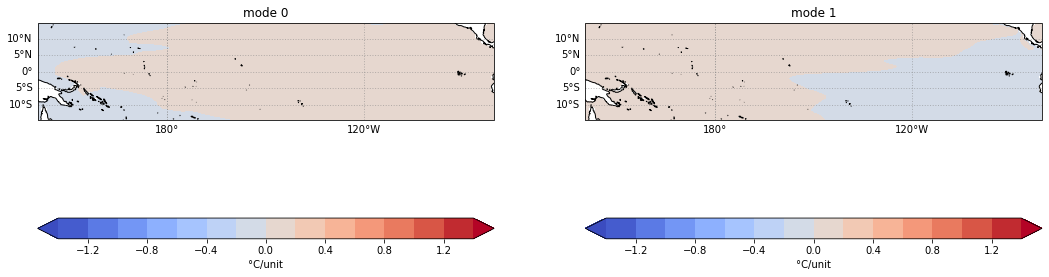

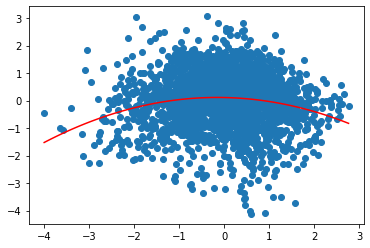

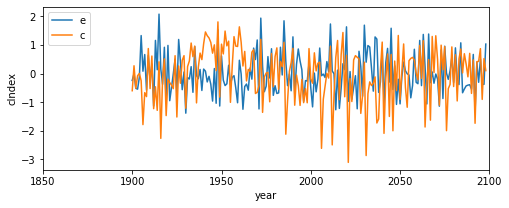

ACCESS-ESM1-5
[-1, 1]
-0.051952494722133466  ....  -0.21344412030183985


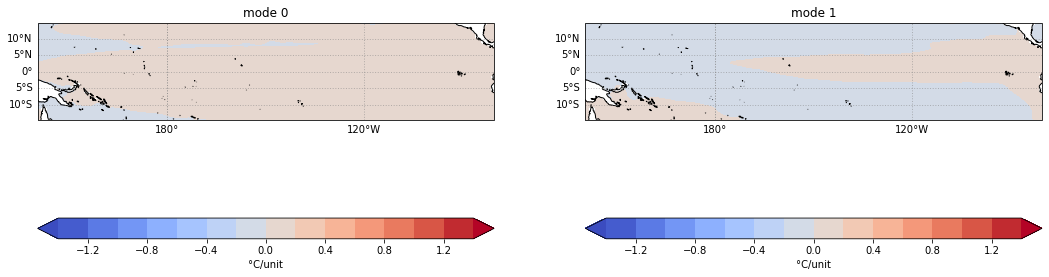

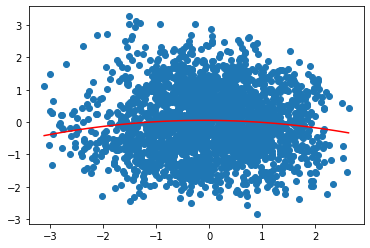

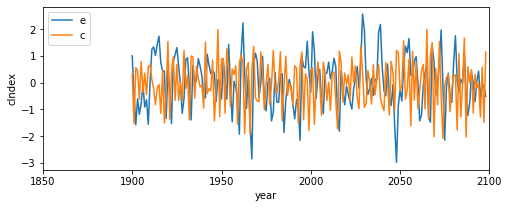

AWI-CM-1-1-MR
[Errno 2] No such file or directory: b'/home/603/as2285/compound/prelim/results/wangAlphas/indexAWI-CM-1-1-MR.nc'
BCC-CSM2-MR
[-1, 1]
-0.0836200551950969  ....  0.08388469008853353


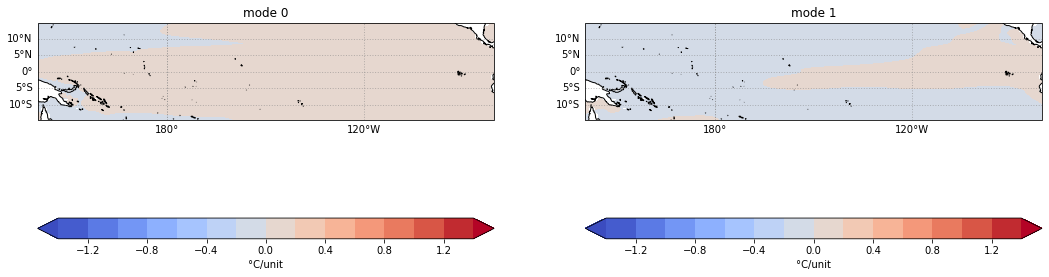

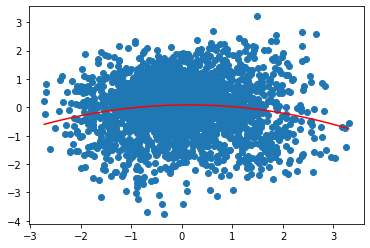

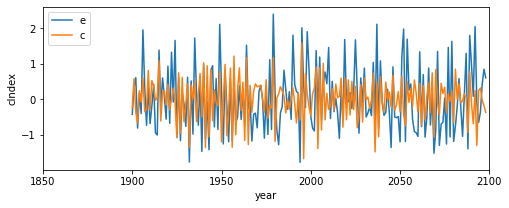

CAMS-CSM1-0
[1, -1]
-0.28414774327271647  ....  -0.4519746364809865


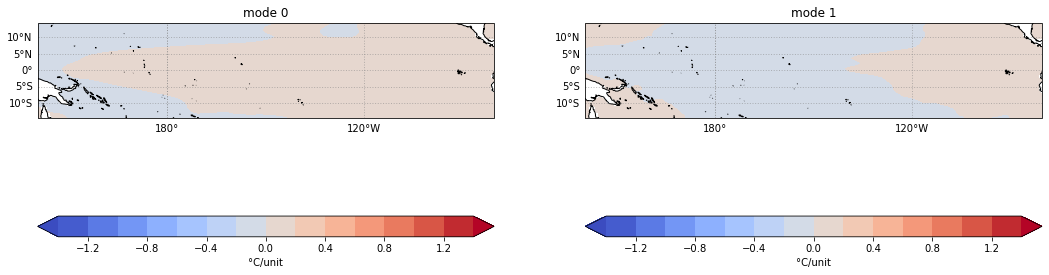

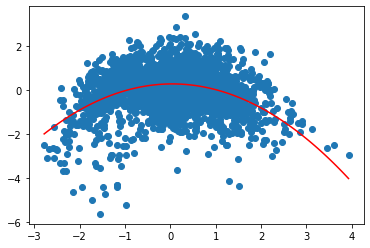

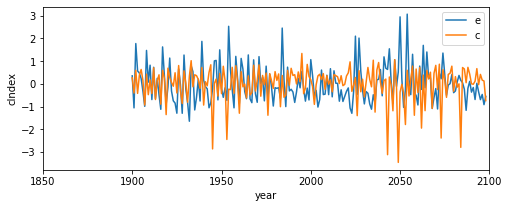

CAS-ESM2-0
[1, -1]
-0.23147687221003094  ....  0.4061616851568129


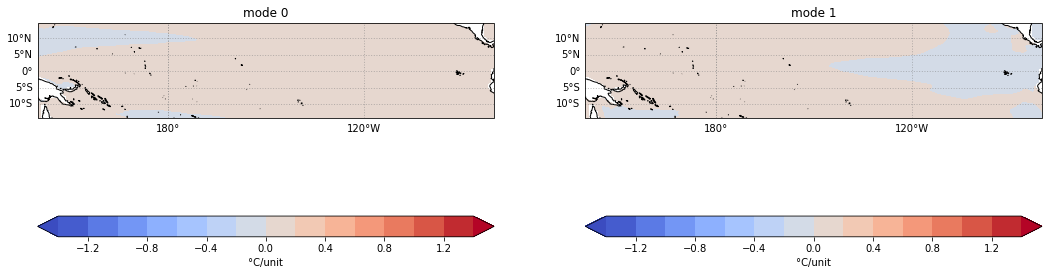

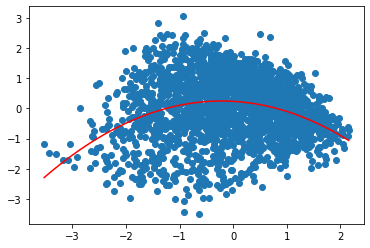

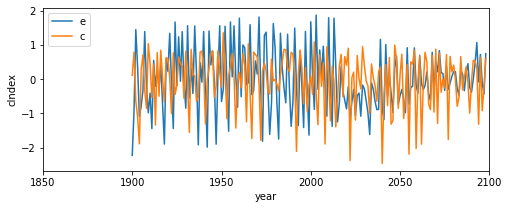

CESM2
[1, 1]
-0.18131488155910333  ....  -0.558642876107533


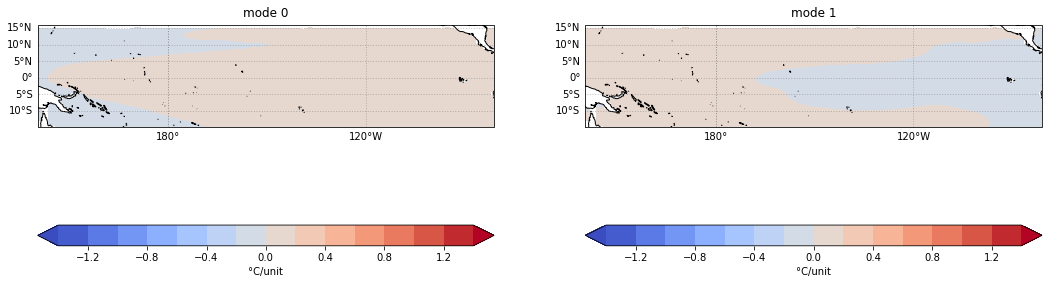

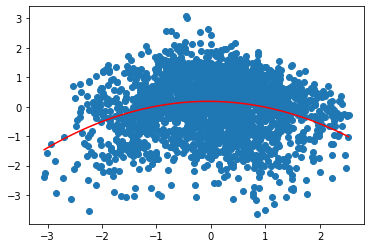

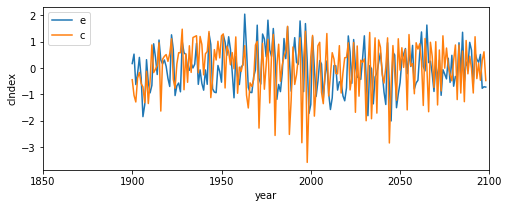

CESM2-WACCM
[-1, -1]
-0.19982634585706577  ....  0.549983392652545


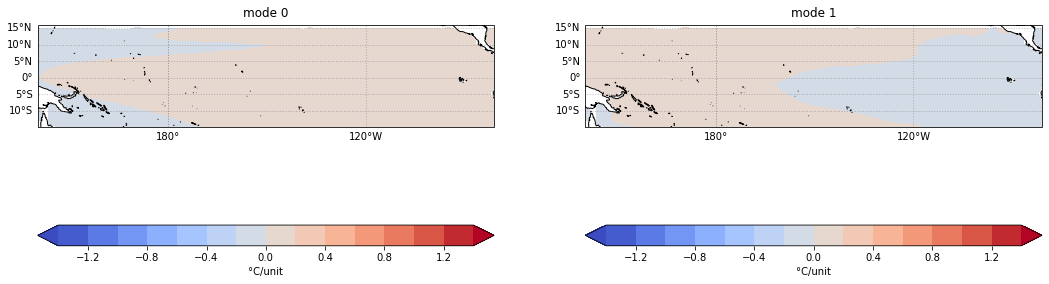

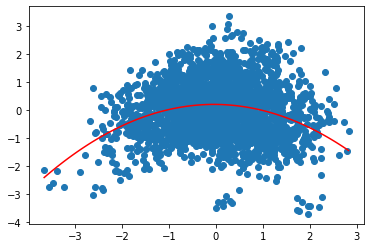

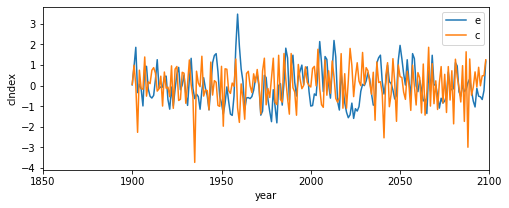

CIESM
[-1, 1]
-0.243649500347558  ....  -0.5943369856551172


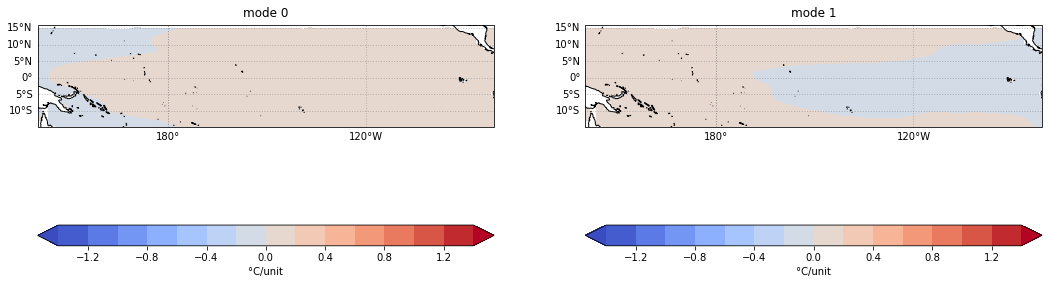

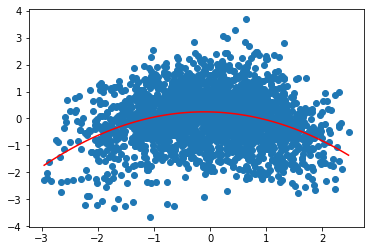

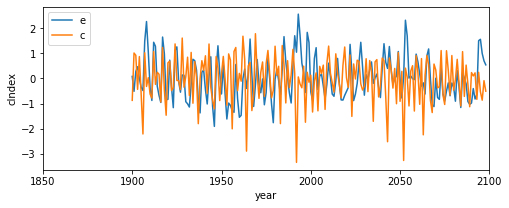

CMCC-CM2-SR5
[-1, -1]
-0.3893086315137675  ....  -0.7034591401213678


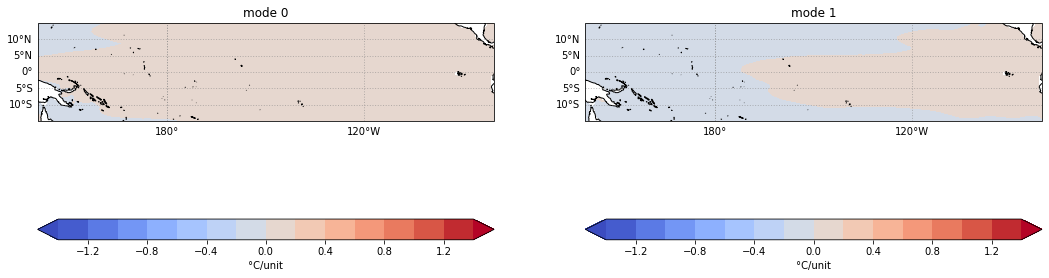

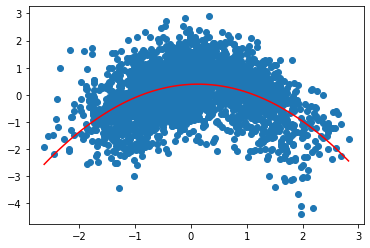

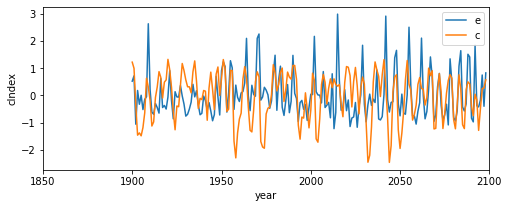

CMCC-ESM2
[-1, -1]
-0.43505660660148376  ....  0.7337070177883266


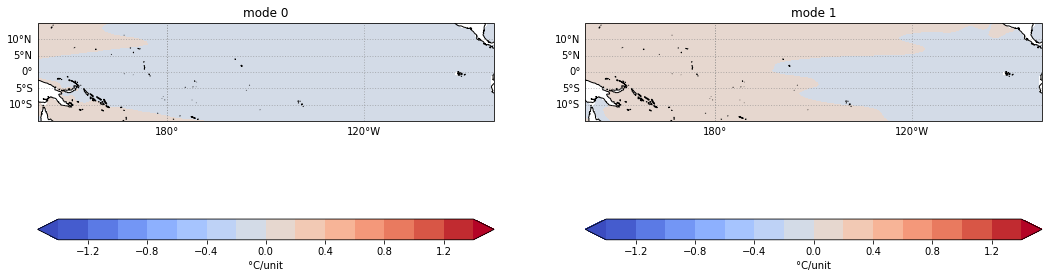

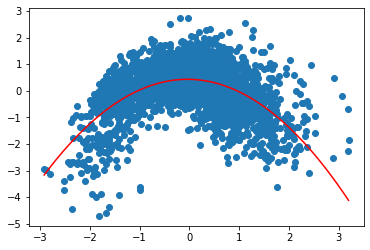

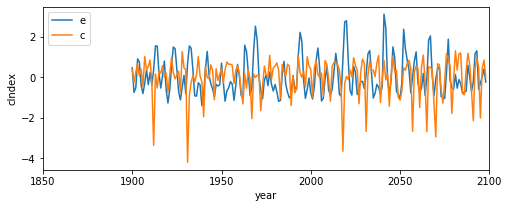

CNRM-CM6-1
[-1, 1]
-0.15714947591073608  ....  -0.39538572355173957


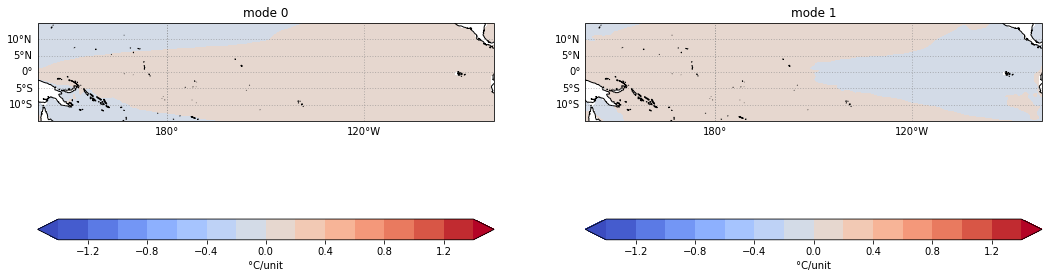

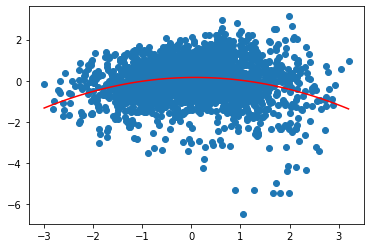

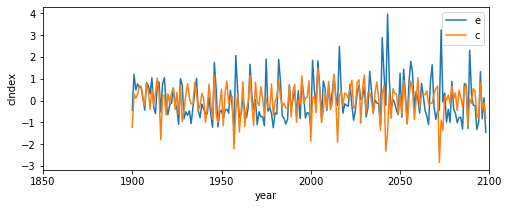

CNRM-ESM2-1
[-1, -1]
-0.16649686062678928  ....  0.4040685281209116


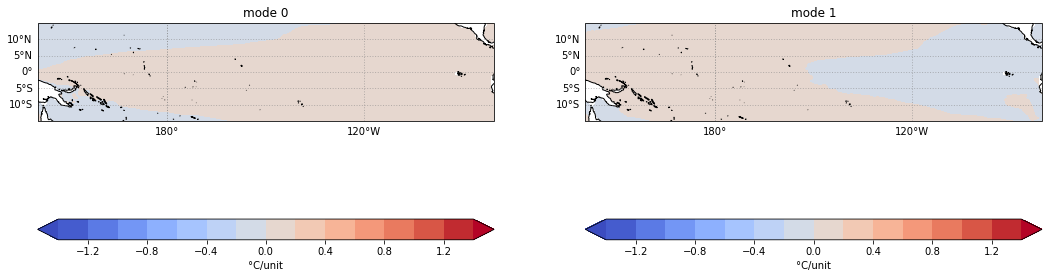

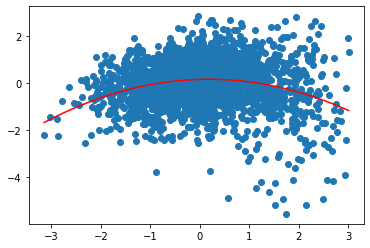

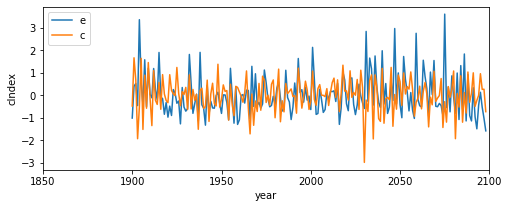

CanESM5
[1, -1]
-0.025288992299442217  ....  0.04873440828041724


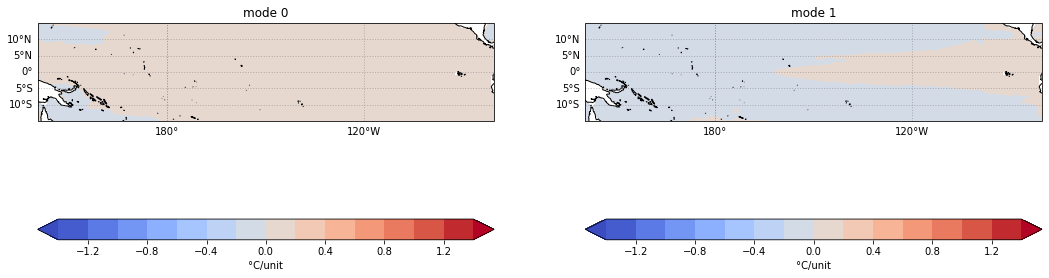

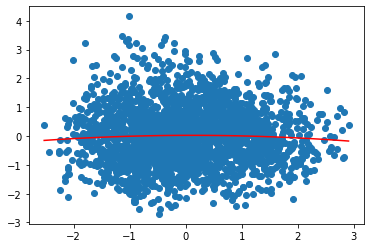

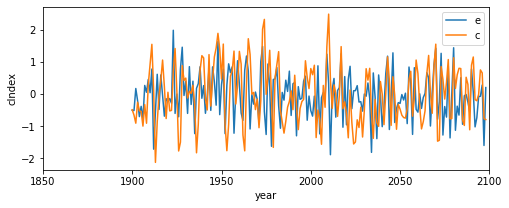

CanESM5-CanOE
[1, -1]
-0.049957122587976126  ....  0.05042941112976595


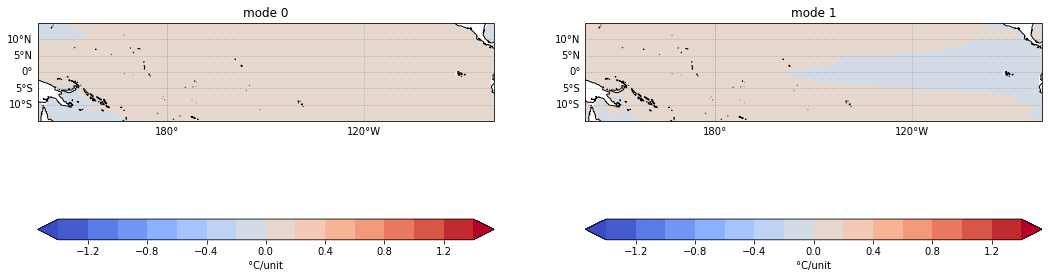

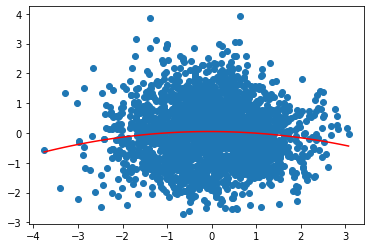

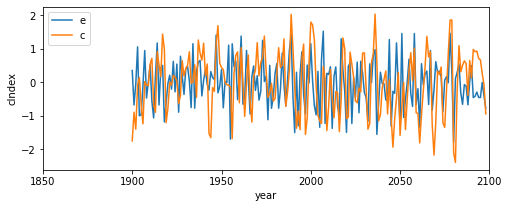

EC-Earth3
[1, -1]
-0.2526927363668093  ....  -0.5423139039131891


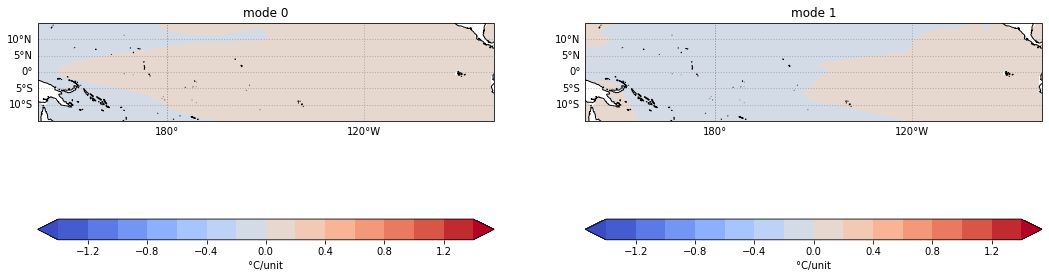

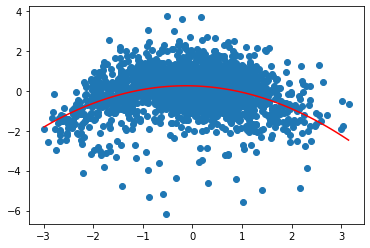

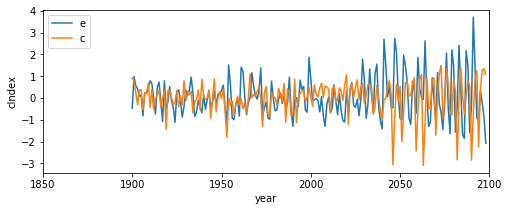

EC-Earth3-CC
[-1, -1]
-0.28889392969341876  ....  0.6145337622083133


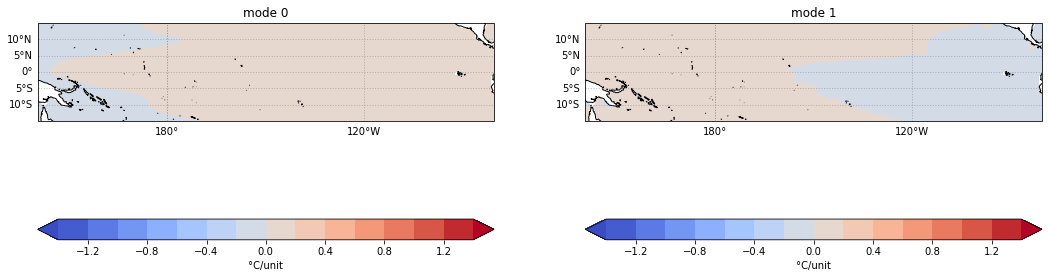

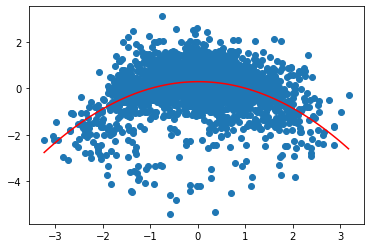

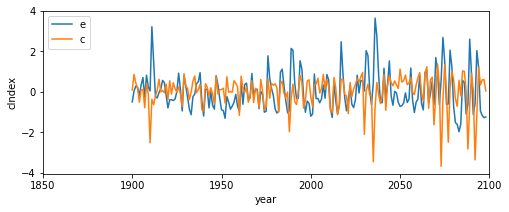

EC-Earth3-Veg
[1, -1]
-0.23994393483609167  ....  -0.54336636981204


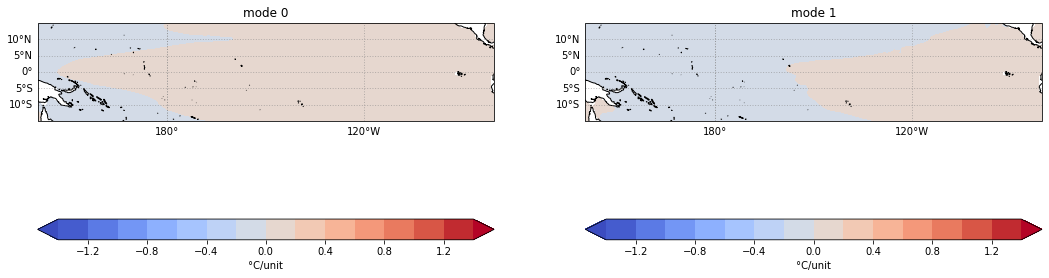

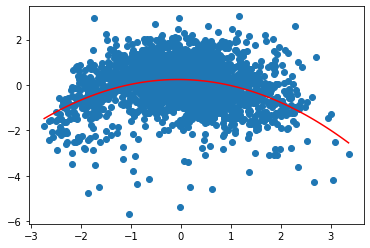

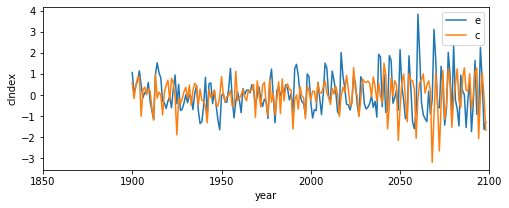

EC-Earth3-Veg-LR
[1, 1]
-0.22276375440728502  ....  -0.7324769985531794


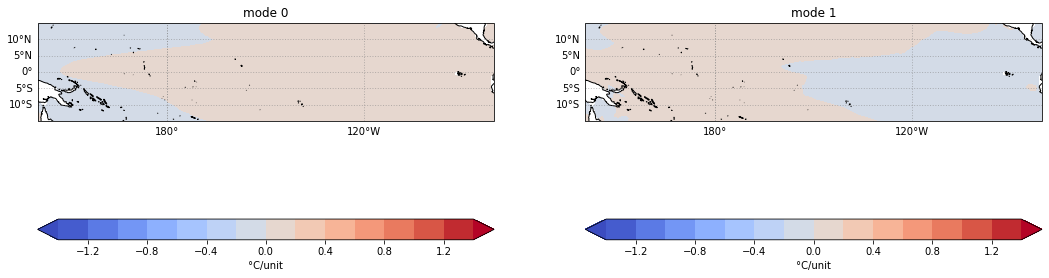

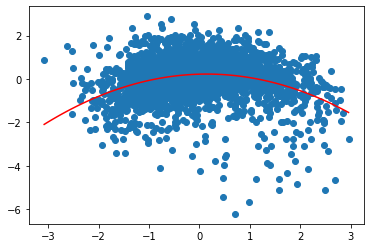

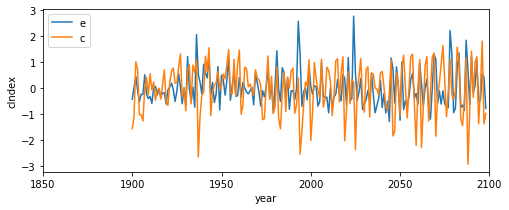

GFDL-CM4
[-1, 1]
-0.12858302359927826  ....  -0.3663755266709173


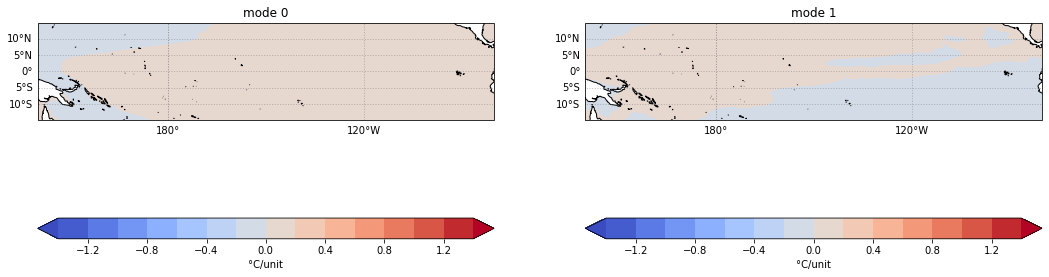

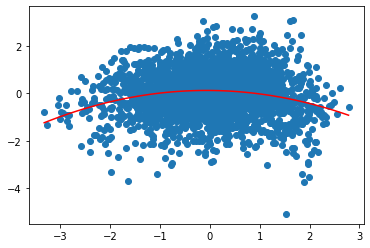

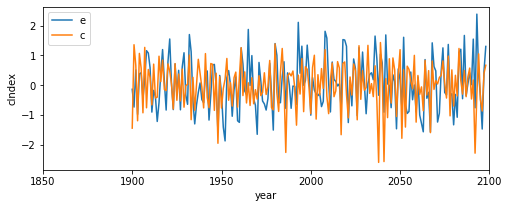

GFDL-ESM4
[1, -1]
-0.1933431399613228  ....  0.47987052903367405


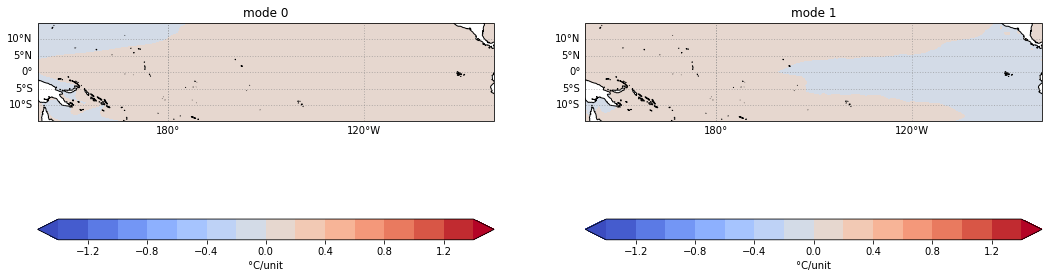

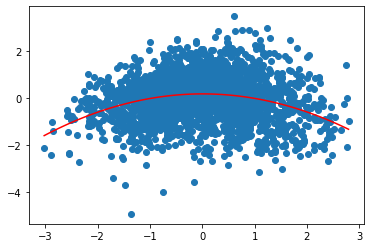

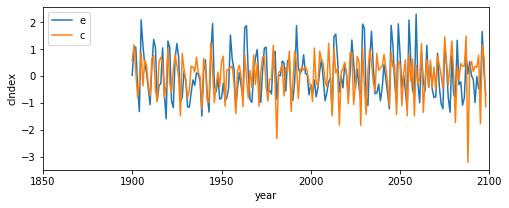

GISS-E2-1-G
[1, -1]
-0.3614290347924608  ....  0.47809609714660056


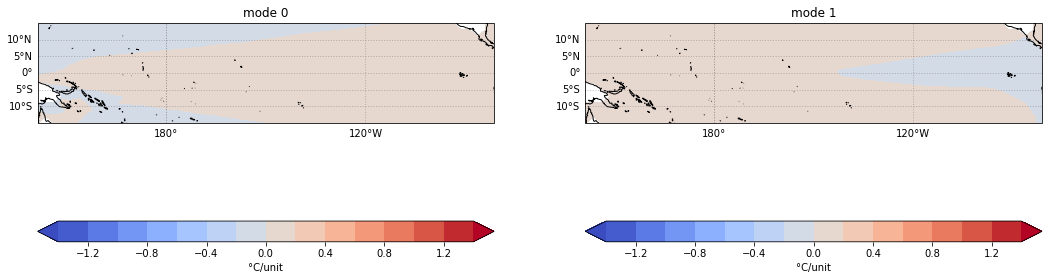

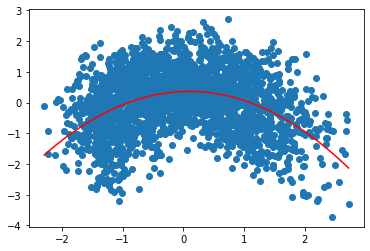

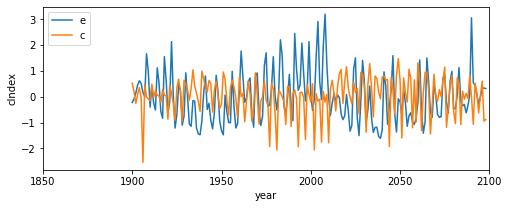

HadGEM3-GC31-LL
[1, -1]
-0.18980297538273963  ....  0.3972199730240259


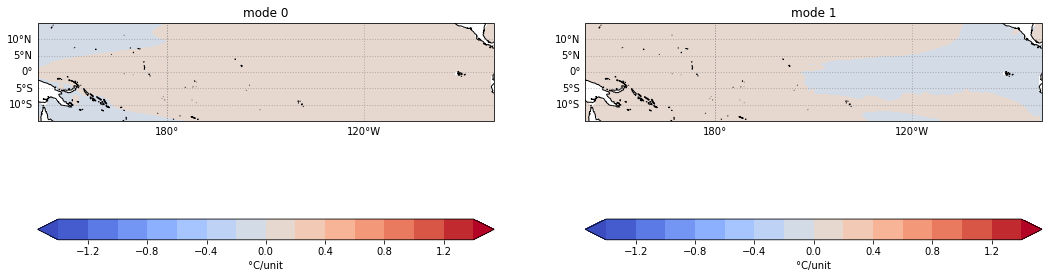

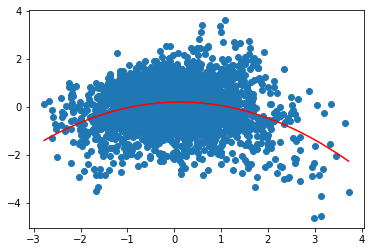

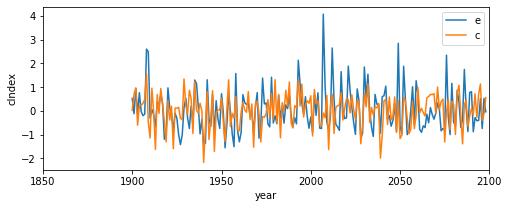

HadGEM3-GC31-MM
[1, 1]
-0.1973979453588834  ....  -0.2046490330219596


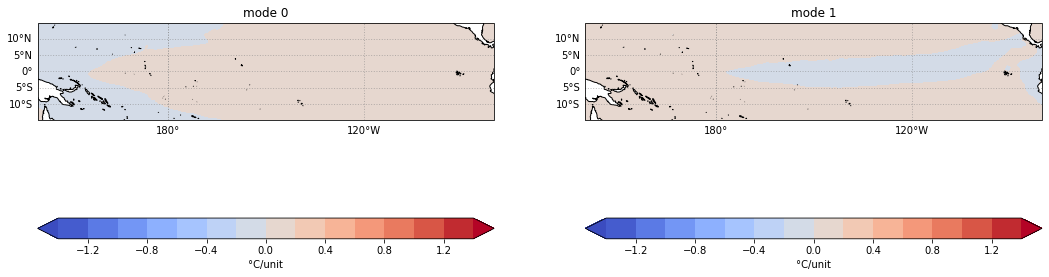

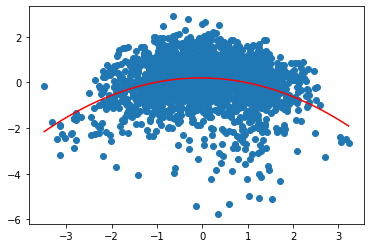

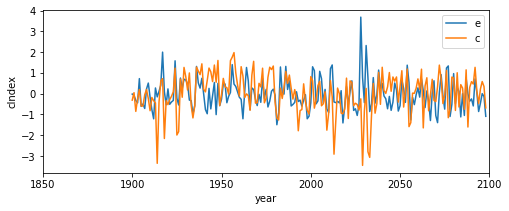

INM-CM4-8
[1, 1]
-0.014454826862872984  ....  -0.03982026221353971


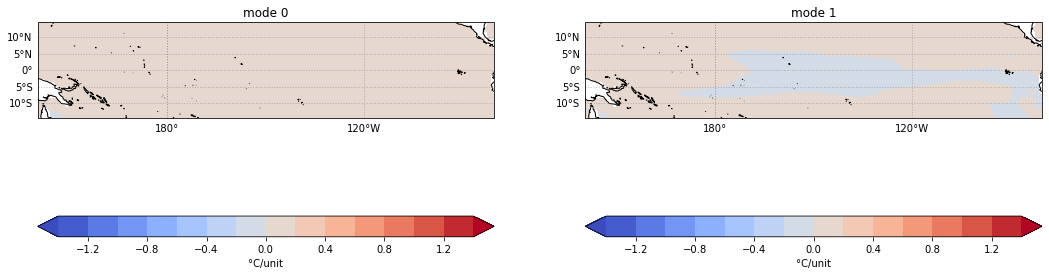

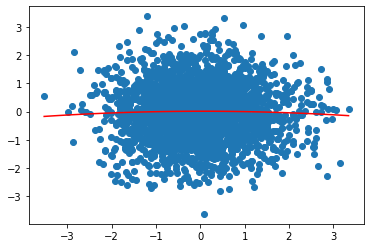

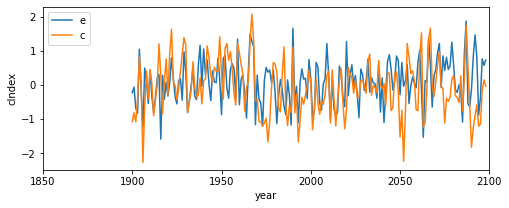

INM-CM5-0
[1, 1]
-0.016410952116096514  ....  0.0018579778494074392


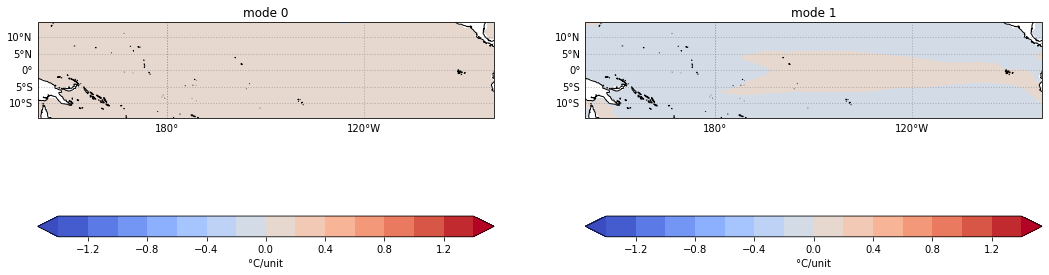

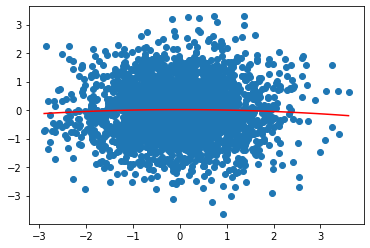

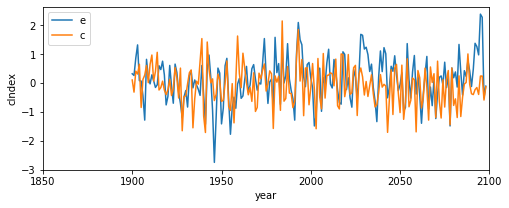

IPSL-CM6A-LR
[1, -1]
-0.05659890838651161  ....  0.29562231647570025


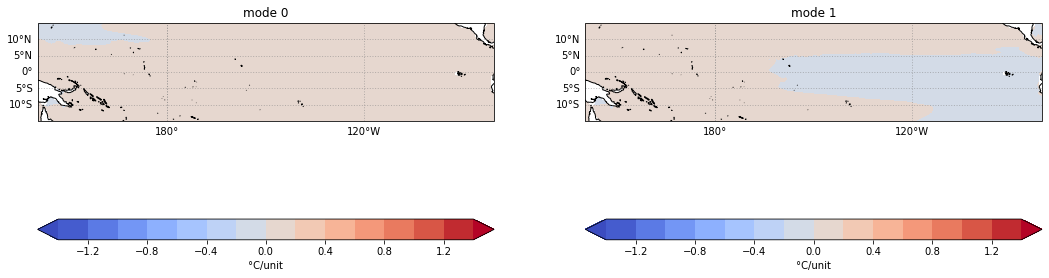

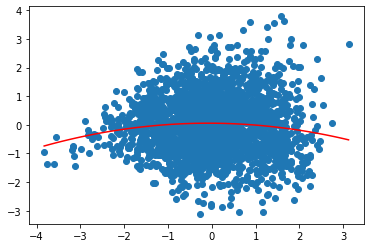

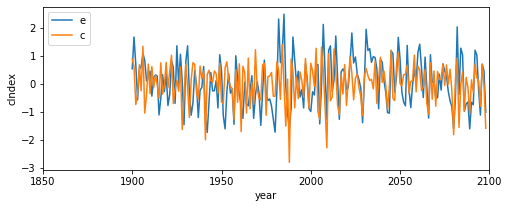

MCM-UA-1-0
[1, -1]
-0.28568839972191445  ....  -0.40545143544083145


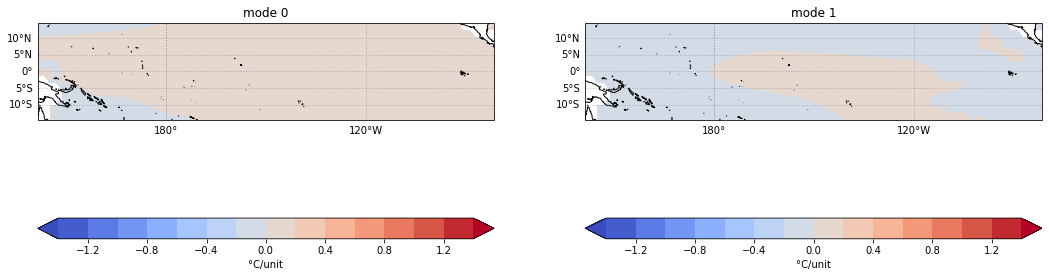

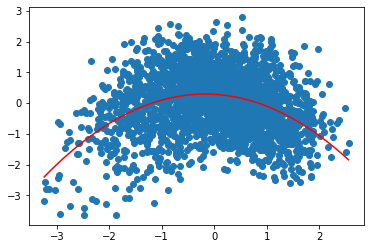

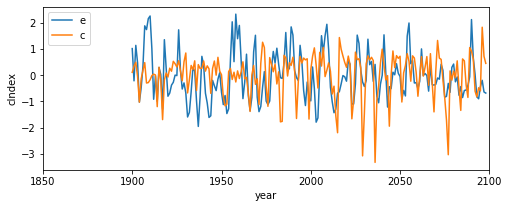

MIROC-ES2L
[1, 1]
-0.3335043982365968  ....  0.8661432379781777


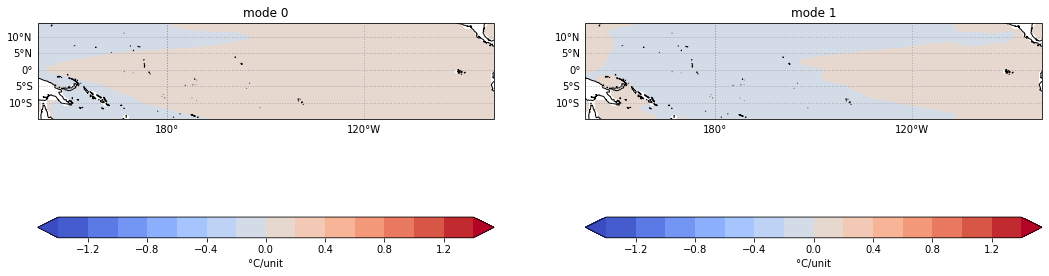

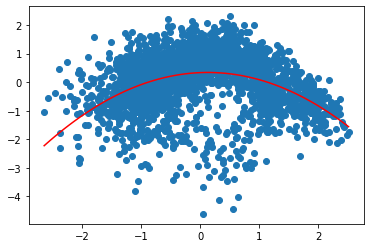

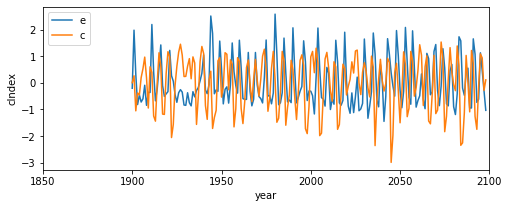

MIROC6
[-1, -1]
-0.31770928520399483  ....  0.6501242366766028


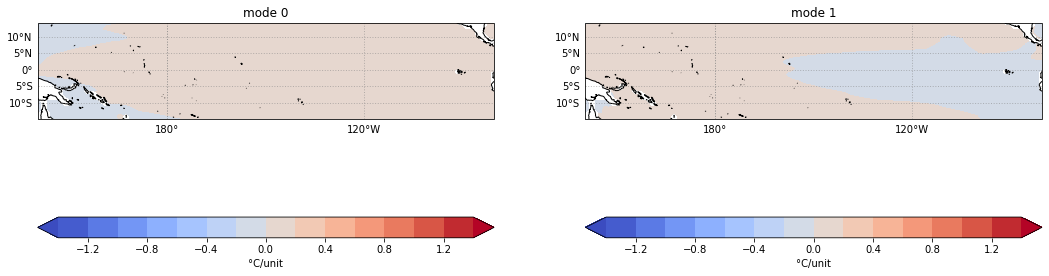

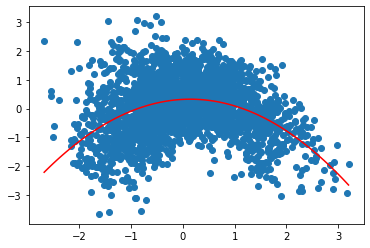

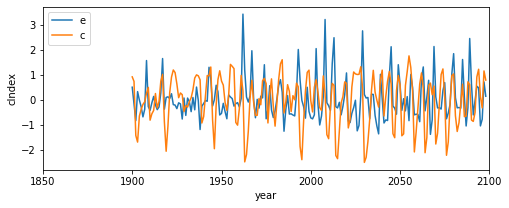

MPI-ESM1-2-HR
[-1, -1]
-0.24698480210373278  ....  -0.153691511657079


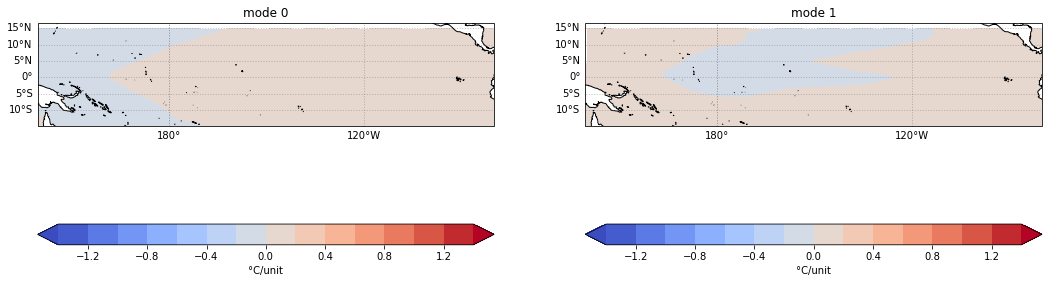

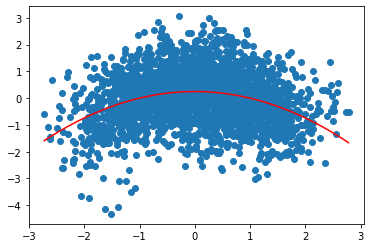

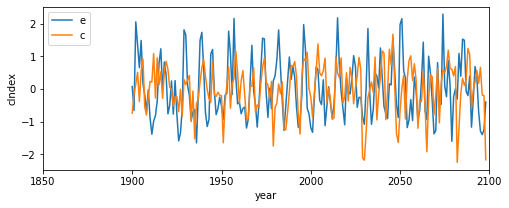

MPI-ESM1-2-LR
[1, 1]
-0.2015519099329522  ....  0.5377769516312338


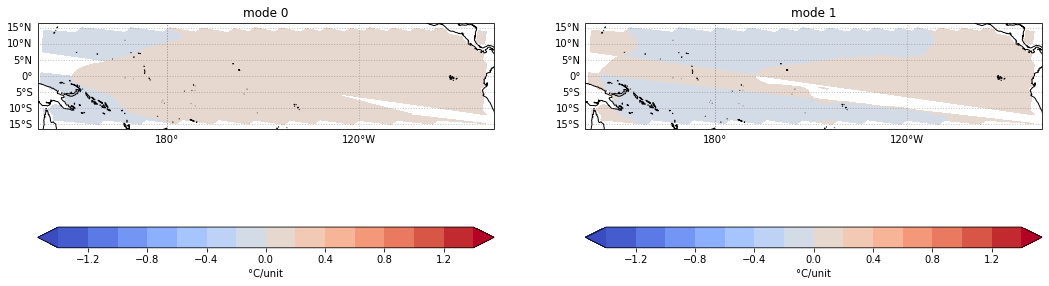

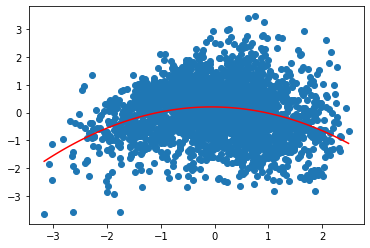

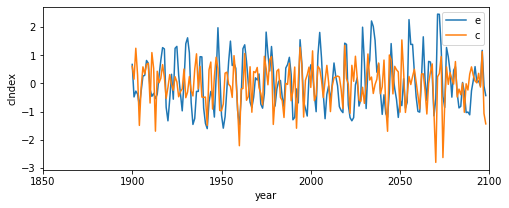

MRI-ESM2-0
[1, 1]
-0.3469949736502555  ....  0.6280817446807483


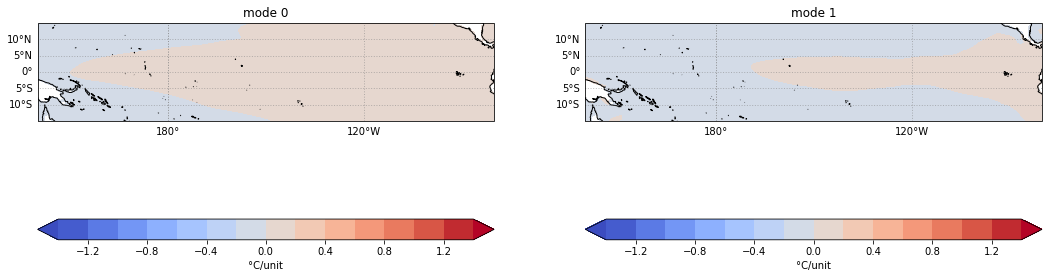

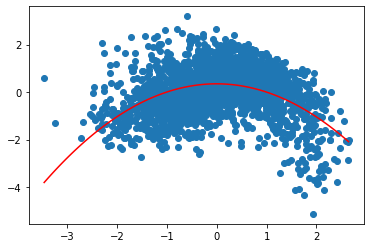

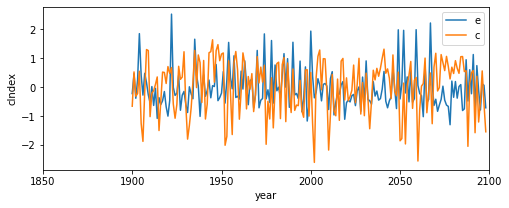

NESM3
[1, -1]
-0.04457945480942532  ....  -0.12858502678575254


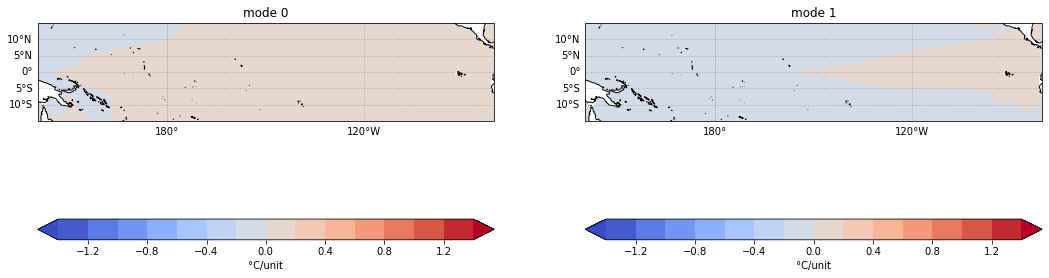

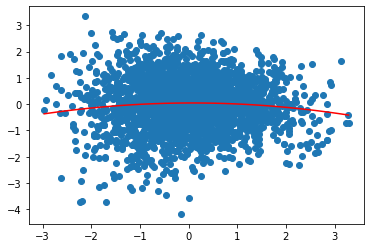

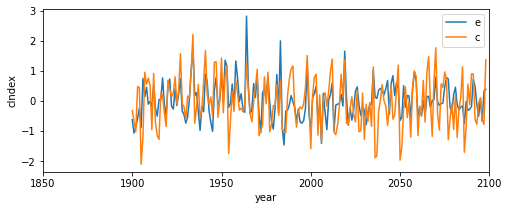

NorESM2-LM
[-1, -1]
-0.25410652241342707  ....  0.5492649851580292


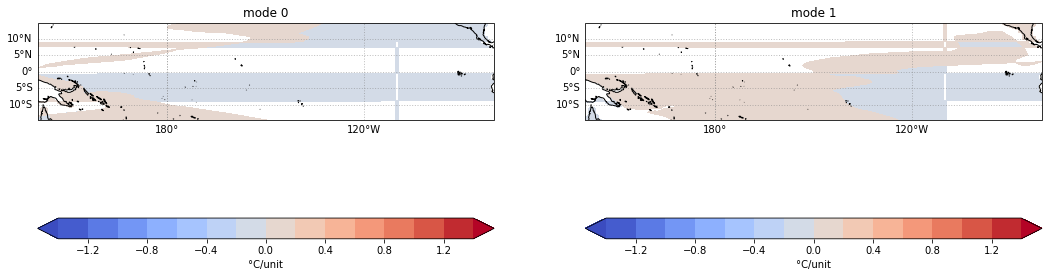

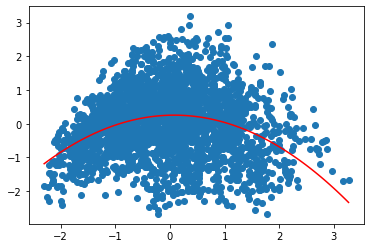

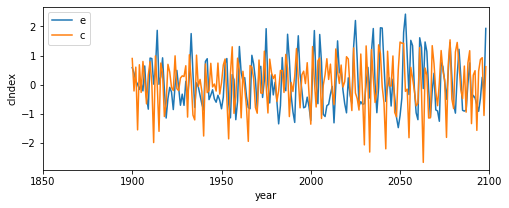

NorESM2-MM
[1, 1]
-0.20586533472477395  ....  0.2950412037236956


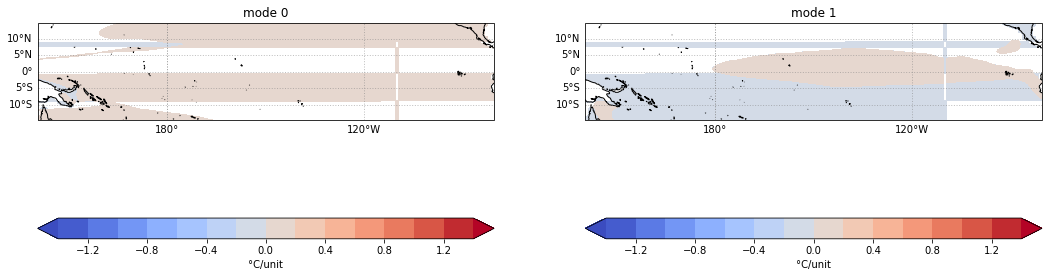

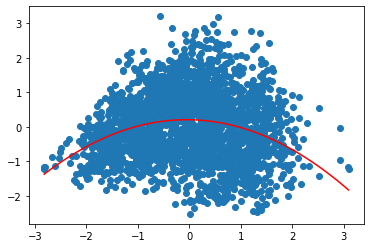

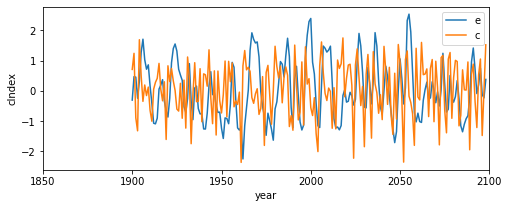

UKESM1-0-LL
[1, 1]
-0.13493266715338262  ....  0.41743101518009657


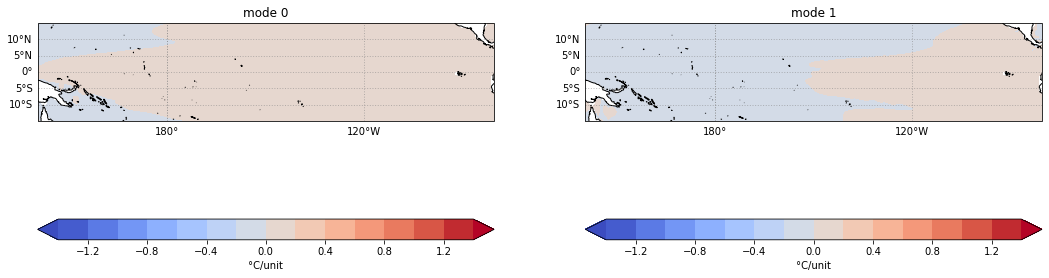

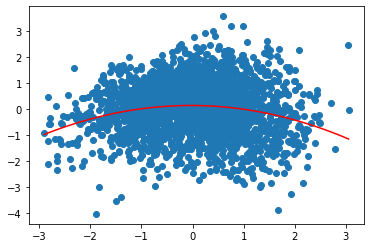

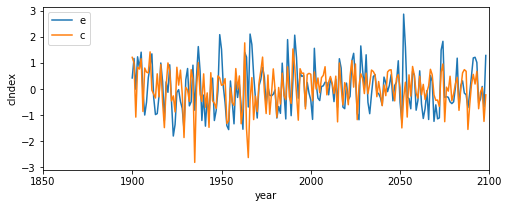

In [5]:
alphas=dict()

resultsLs=list()

for iModel in modelSet:
    import numpy.polynomial as poly
    try:
        print(iModel[1])
        
        indeces=xarray.load_dataset('results/wangAlphas/index'+str(iModel[1])+'.nc')
        eofsXr=xarray.load_dataarray('results/wangAlphas/eof'+str(iModel[1])+'.nc')
        
        alpha=float(indeces.alpha.values)
        
        multiplyBy=multipliers[iModel[1]]
        
        print(multiplyBy)
        
        pc1=multiplyBy[0]*indeces.pc1
        pc2=multiplyBy[1]*indeces.pc2
        pFit = poly.Polynomial.fit(pc1, pc2, 2)
        alpha = pFit.convert().coef[2]
        
        print(str(alpha)+'  ....  ' + str(indeces.alphaDjf.values))
        alphas[iModel[1]]=alpha
        
        fig=plt.figure(figsize=(18,12))
        
        for mode in [0,1]:
            ax=fig.add_subplot(1,2,mode+1,
                           projection=ccrs.Miller(central_longitude=210))

            ec.ensoPlotter(multiplyBy[mode]*eofsXr.sel(mode=mode), ax)

            plt.title("mode " + str(mode))

        plt.show()

        
        
        plt.scatter(pc1, pc2)

        plt.plot(*pFit.linspace(), 'r')
        
        plt.show()
        
        indexXr=xarray.Dataset()
        indexXr['eIndex']=(multiplyBy[0]*indeces.pc1-multiplyBy[1]*indeces.pc2)/numpy.sqrt(2)
        indexXr['cIndex']=(multiplyBy[0]*indeces.pc1+multiplyBy[1]*indeces.pc2)/numpy.sqrt(2)
        indexXr['model']=iModel
          
        warmSeasXr=tp.averageForTimePeriod(indexXr)
            
        fig = plt.figure(figsize=(8,3))
        
        warmSeasXr.eIndex.plot()
        warmSeasXr.cIndex.plot()
        
        plt.legend(['e','c'])
        plt.xlim([1850,2100])
        plt.show()
            
        warmSeasXr['model']=iModel
        resultsLs.append(warmSeasXr)
        
    except Exception as e:
        print(e)

results=xarray.concat(resultsLs,'model')

This is the models which have alpha less than -0.15 from the Wang 2020

In [6]:
wangsAnswers={'CAMS-CSM1-0':-0.2902, 
    'CMCC-CM2-SR5':-0.4055, 
    'CNRM-CM6-1':-0.1662, 
    'CNRM-ESM2-1':-0.1687,
    'EC-Earth3':-0.2662, 
    'EC-Earth3-Veg':-0.2665, 
    'FIO-ESM-2-0':-0.3751,
    'MIROC6':-0.3198, 
    'MIROC-ES2L': -0.3466,
    'HadGEM3-GC31-LL':-0.1785, 
    'MPI-ESM1-2-HR':-0.2660, 
    'MPI-ESM1-2-LR':-0.2338, 
    'MRI-ESM2-0':-0.3387,
    'GISS-E2-1-G':-0.3644, 
    'CESM2':-0.3216, 
    'CESM2-WACCM':-0.2436, 
    'NorESM2-LM':-0.2505, 
    'NorESM2-MM':-.2077,
    'GFDL-ESM4':-.1931, 
    'CIESM':-.1886, 
    'MCM-UA-1-0':-0.2888}

In [7]:
print('model         calculated           expected')
for iModel in wangsAnswers.keys():
    try:
        print(str(iModel) + ' : ' + str(alphas[iModel]) + '   ' + str(wangsAnswers[iModel]))
    except:
        print(str(iModel) + ' results not found')

model         calculated           expected
CAMS-CSM1-0 : -0.28414774327271647   -0.2902
CMCC-CM2-SR5 : -0.3893086315137675   -0.4055
CNRM-CM6-1 : -0.15714947591073608   -0.1662
CNRM-ESM2-1 : -0.16649686062678928   -0.1687
EC-Earth3 : -0.2526927363668093   -0.2662
EC-Earth3-Veg : -0.23994393483609167   -0.2665
FIO-ESM-2-0 results not found
MIROC6 : -0.31770928520399483   -0.3198
MIROC-ES2L : -0.3335043982365968   -0.3466
HadGEM3-GC31-LL : -0.18980297538273963   -0.1785
MPI-ESM1-2-HR : -0.24698480210373278   -0.266
MPI-ESM1-2-LR : -0.2015519099329522   -0.2338
MRI-ESM2-0 : -0.3469949736502555   -0.3387
GISS-E2-1-G : -0.3614290347924608   -0.3644
CESM2 : -0.18131488155910333   -0.3216
CESM2-WACCM : -0.19982634585706577   -0.2436
NorESM2-LM : -0.25410652241342707   -0.2505
NorESM2-MM : -0.20586533472477395   -0.2077
GFDL-ESM4 : -0.1933431399613228   -0.1931
CIESM : -0.243649500347558   -0.1886
MCM-UA-1-0 : -0.28568839972191445   -0.2888


In [8]:
#an attempt to match up the published answers with my calculated ones. A better idea would be to run a is close function.

for iModel in wangsAnswers.keys():
        try:
            if alphas[iModel]<-0.15:
                print(iModel + ' matched: ' + str(alphas[iModel]) + '  ' + str(wangsAnswers[iModel]))
            else:
                print(iModel + ' not matched: ' + str(alphas[iModel]) + '  ' + str(wangsAnswers[iModel]))
        except:
            print(iModel + ' not matched')

CAMS-CSM1-0 matched: -0.28414774327271647  -0.2902
CMCC-CM2-SR5 matched: -0.3893086315137675  -0.4055
CNRM-CM6-1 matched: -0.15714947591073608  -0.1662
CNRM-ESM2-1 matched: -0.16649686062678928  -0.1687
EC-Earth3 matched: -0.2526927363668093  -0.2662
EC-Earth3-Veg matched: -0.23994393483609167  -0.2665
FIO-ESM-2-0 not matched
MIROC6 matched: -0.31770928520399483  -0.3198
MIROC-ES2L matched: -0.3335043982365968  -0.3466
HadGEM3-GC31-LL matched: -0.18980297538273963  -0.1785
MPI-ESM1-2-HR matched: -0.24698480210373278  -0.266
MPI-ESM1-2-LR matched: -0.2015519099329522  -0.2338
MRI-ESM2-0 matched: -0.3469949736502555  -0.3387
GISS-E2-1-G matched: -0.3614290347924608  -0.3644
CESM2 matched: -0.18131488155910333  -0.3216
CESM2-WACCM matched: -0.19982634585706577  -0.2436
NorESM2-LM matched: -0.25410652241342707  -0.2505
NorESM2-MM matched: -0.20586533472477395  -0.2077
GFDL-ESM4 matched: -0.1933431399613228  -0.1931
CIESM matched: -0.243649500347558  -0.1886
MCM-UA-1-0 matched: -0.285688399

Those results are broadly similar. 


Except:
CESM2 matched: -0.18131488155910333  -0.3216
But they retracted and repovided ssp585 in late 2020 due to some issues with the forcings, which might explain that.




In [21]:
results

<xarray.Dataset>
Dimensions:  (model: 144, year: 199)
Coordinates:
  * year     (year) int64 1900 1901 1902 1903 1904 ... 2094 2095 2096 2097 2098
  * model    (model) <U19 'CSIRO-ARCCSS' 'ACCESS-CM2' ... 'r1i1p1f2' 'r1i1p1f2'
Data variables:
    eIndex   (model, year) float64 -0.2397 0.004567 -0.516 ... -0.6839 1.283
    cIndex   (model, year) float64 -0.5982 0.2741 -0.5157 ... -1.24 -0.223

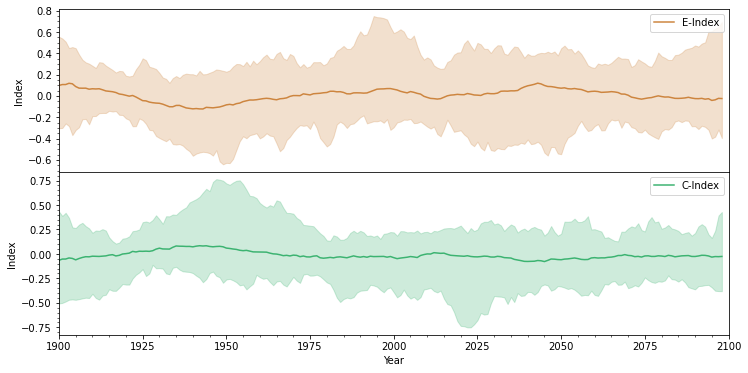

In [24]:
# plot indeces for an experiment, and add some lines for +- 1 sigma

indexToPlot = ['eIndex', 'cIndex']
labels = ['E-Index', 'C-Index', 'SamWinter', 'SamSummer']
colors = ['peru', 'mediumseagreen', 'rebeccapurple', 'rebeccapurple']
lims = [(-4,4), [-4,4], [-4,4], [-4,4]]

fig = plt.figure(figsize=(12,6))

for i in range(2):

    #create a subplot (row, column, size)
    ax=fig.add_subplot(2,1,i+1)

    # plot the actual data
    plotData=results[indexToPlot[i]]
    #piControl=ecXr[indexToPlot[i]].sel(experiment='piControl',drop=True)

    #blue line for multi-experiment mean, and light blue shading between min and max
    plt.plot(
        plotData.year, 
        (plotData.rolling(year=30, min_periods=15, center=True).mean('year')).mean('model').values, 
        label=labels[i], 
        color=colors[i]
    )
    plt.legend(loc='upper right')
    
    #obsXr[indexToPlot[i]].rolling(year=30, min_periods=15, center=True).mean('year').plot()
    
    plt.fill_between(
        plotData.year, 
        plotData.rolling(year=30, min_periods=15, center=True).mean('year').min('model').values,
        plotData.rolling(year=30, min_periods=15, center=True).mean('year').max('model').values, 
                     color=colors[i], alpha=0.25
    )
    

    #piMean=(piControl.rolling(year=30, min_periods=15, center=True).mean('year')).mean()
    #piStd=(piControl.rolling(year=30, min_periods=15, center=True).mean('year')).mean('year').std('model')

    #plt.hlines([piMean+1.96*piStd,piMean-1.96*piStd],1900,2100, color='grey', linestyles='dashed', alpha=0.5)
    

    
    
    #plt.ylim([0,2.3])
    #plt.yticks([0,1,2])
    plt.xlim([1900,2100])
    plt.minorticks_on()
    plt.ylabel('Index')
    plt.xlabel('')
    ax.xaxis.set_visible(False)
    
    
plt.subplots_adjust(hspace=0)
plt.xlabel('Year')
ax.xaxis.set_visible(True)

#plt.savefig('results/cmip6IndexStdTrends.pdf')


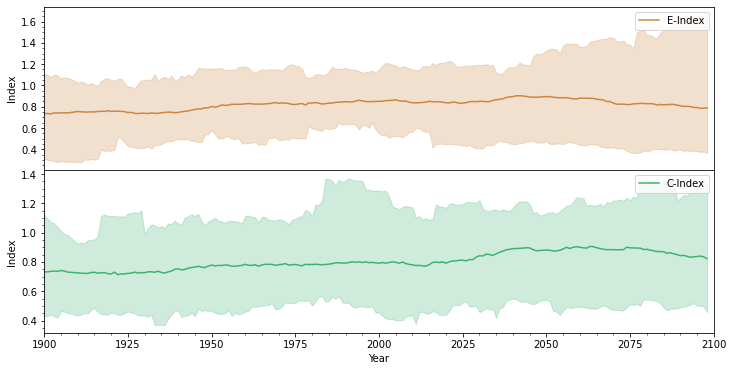

In [25]:
# plot indeces for an experiment, and add some lines for +- 1 sigma

indexToPlot = ['eIndex', 'cIndex']
labels = ['E-Index', 'C-Index', 'SamWinter', 'SamSummer']
colors = ['peru', 'mediumseagreen', 'rebeccapurple', 'rebeccapurple']
lims = [(-4,4), [-4,4], [-4,4], [-4,4]]

fig = plt.figure(figsize=(12,6))

for i in range(2):

    #create a subplot (row, column, size)
    ax=fig.add_subplot(2,1,i+1)

    # plot the actual data
    plotData=results[indexToPlot[i]]
    #piControl=ecXr[indexToPlot[i]].sel(experiment='piControl',drop=True)

    #blue line for multi-experiment mean, and light blue shading between min and max
    plt.plot(
        plotData.year, 
        (plotData.rolling(year=30, min_periods=15, center=True).std('year')).mean('model').values, 
        label=labels[i], 
        color=colors[i]
    )
    plt.legend(loc='upper right')
    
    #obsXr[indexToPlot[i]].rolling(year=30, min_periods=15, center=True).mean('year').plot()
    
    plt.fill_between(
        plotData.year, 
        plotData.rolling(year=30, min_periods=15, center=True).std('year').min('model').values,
        plotData.rolling(year=30, min_periods=15, center=True).std('year').max('model').values, 
                     color=colors[i], alpha=0.25
    )
    

    #piMean=(piControl.rolling(year=30, min_periods=15, center=True).mean('year')).mean()
    #piStd=(piControl.rolling(year=30, min_periods=15, center=True).mean('year')).mean('year').std('model')

    #plt.hlines([piMean+1.96*piStd,piMean-1.96*piStd],1900,2100, color='grey', linestyles='dashed', alpha=0.5)
    

    
    
    #plt.ylim([0,2.3])
    #plt.yticks([0,1,2])
    plt.xlim([1900,2100])
    plt.minorticks_on()
    plt.ylabel('Index')
    plt.xlabel('')
    ax.xaxis.set_visible(False)
    
    
plt.subplots_adjust(hspace=0)
plt.xlabel('Year')
ax.xaxis.set_visible(True)

#plt.savefig('results/cmip6IndexStdTrends.pdf')


# Full example /sandbox

Climatology and piControl:

In [3]:
import helpers.fileHandler as fh
import utils.timePeriod as tp

In [6]:
for iModel in [modelSet[33]]:
    
    #print(iModel)
    
    #try: 
            
        #to replicate Wang 2020
        tsXr = xarray.concat([fh.loadModelData(iModel[1], 'tos_Omon', 'historical', iModel[3]).tos, 
                              fh.loadModelData(iModel[1], 'tos_Omon', 'ssp585', iModel[3]).tos], 
                             dim='time')

    #except Exception as e:
    #    print(iModel[1] + " did not open")
    #    print(e)
 

In [7]:
tsXr.lon

<xarray.DataArray 'lon' (j: 292, i: 362)>
array([[72.5     , 73.5     , 74.5     , ..., 71.5     , 72.5     ,
        73.5     ],
       [72.5     , 73.5     , 74.5     , ..., 71.5     , 72.5     ,
        73.5     ],
       [72.5     , 73.5     , 74.5     , ..., 71.5     , 72.5     ,
        73.5     ],
       ...,
       [72.95764 , 73.04236 , 73.115326, ..., 72.884674, 72.95764 ,
        73.04236 ],
       [72.989136, 73.010864, 73.03705 , ..., 72.96295 , 72.989136,
        73.010864],
       [73.      , 72.989136, 72.96295 , ..., 73.03705 , 73.      ,
        72.989136]], dtype=float32)
Coordinates:
  * j        (j) int32 1 2 3 4 5 6 7 8 9 ... 284 285 286 287 288 289 290 291 292
  * i        (i) int32 1 2 3 4 5 6 7 8 9 ... 354 355 356 357 358 359 360 361 362
    lat      (j, i) float32 -78.39 -78.39 -78.39 -78.39 ... 50.23 50.01 50.01
    lon      (j, i) float32 72.5 73.5 74.5 75.5 76.5 ... 73.05 73.04 73.0 72.99

Cut it into the area of interest

In [8]:
tsXr=tsXr.where(
    (tsXr.lat>=-15) & (tsXr.lat<=15) &
    (tsXr.lon>=140) & (tsXr.lon<=280),
    drop=True
)

In [9]:
tsXr

<xarray.DataArray 'tos' (time: 3012, j: 61, i: 140)>
dask.array<where, shape=(3012, 61, 140), dtype=float32, chunksize=(1980, 61, 140), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 1850-01-16 00:00:00 ... 2100-12-16 00:00:00
  * j        (j) int32 117 118 119 120 121 122 123 ... 172 173 174 175 176 177
  * i        (i) int32 69 70 71 72 73 74 75 76 ... 202 203 204 205 206 207 208
    lat      (j, i) float32 -14.89 -14.89 -14.89 -14.89 ... 14.89 14.89 14.89
    lon      (j, i) float32 140.5 141.5 142.5 143.5 ... 276.5 277.5 278.5 279.5
Attributes:
    standard_name:  sea_surface_temperature
    long_name:      Sea Surface Temperature
    comment:        Temperature of upper boundary of the liquid ocean, includ...
    units:          degC
    cell_methods:   area: mean where sea time: mean (interval: 1 month)
    cell_measures:  area: areacello

In [10]:
tsXr=tsXr.where(
    (tsXr.time.dt.year>=1900) * (tsXr.time.dt.year<2100), 
    drop=True
)


In [11]:
tsXr 

<xarray.DataArray 'tos' (time: 2400, j: 61, i: 140)>
dask.array<where, shape=(2400, 61, 140), dtype=float32, chunksize=(1380, 61, 140), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 1900-01-16 00:00:00 ... 2099-12-16 00:00:00
  * j        (j) int32 117 118 119 120 121 122 123 ... 172 173 174 175 176 177
  * i        (i) int32 69 70 71 72 73 74 75 76 ... 202 203 204 205 206 207 208
    lat      (j, i) float32 -14.89 -14.89 -14.89 -14.89 ... 14.89 14.89 14.89
    lon      (j, i) float32 140.5 141.5 142.5 143.5 ... 276.5 277.5 278.5 279.5
Attributes:
    standard_name:  sea_surface_temperature
    long_name:      Sea Surface Temperature
    comment:        Temperature of upper boundary of the liquid ocean, includ...
    units:          degC
    cell_methods:   area: mean where sea time: mean (interval: 1 month)
    cell_measures:  area: areacello

In [12]:
from eofs.xarray import Eof



In [51]:
trendXr = tsXr.mean(['i','j']).polyfit('time', 2)

In [52]:
trendXr

<xarray.Dataset>
Dimensions:               (degree: 3)
Coordinates:
  * degree                (degree) int64 2 1 0
Data variables:
    polyfit_coefficients  (degree) float64 dask.array<chunksize=(3,), meta=np.ndarray>

In [53]:
trendXr = xarray.polyval(tsXr.time, trendXr.polyfit_coefficients, 'degree')


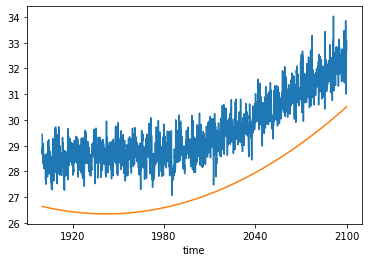

In [55]:
tsXr.isel(i=20,j=20).plot()
trendXr.plot()

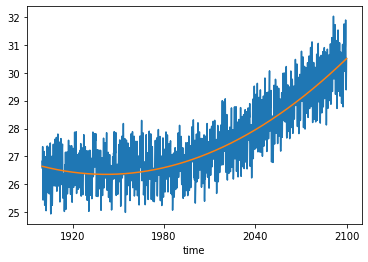

In [57]:
tsXr.mean(['i','j']).plot()
trendXr.plot()

In [58]:
detrendXr=tsXr-trendXr

In [19]:
detrendXr

<xarray.DataArray (time: 2400, j: 61, i: 140)>
dask.array<sub, shape=(2400, 61, 140), dtype=float64, chunksize=(1380, 61, 140), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 1900-01-16 00:00:00 ... 2099-12-16 00:00:00
  * j        (j) int32 117 118 119 120 121 122 123 ... 172 173 174 175 176 177
  * i        (i) int32 69 70 71 72 73 74 75 76 ... 202 203 204 205 206 207 208
    lat      (j, i) float32 -14.89 -14.89 -14.89 -14.89 ... 14.89 14.89 14.89
    lon      (j, i) float32 140.5 141.5 142.5 143.5 ... 276.5 277.5 278.5 279.5

In [20]:
sstMeanXr=detrendXr.where((detrendXr.time.dt.year>=1900) * (detrendXr.time.dt.year<2000), 
            drop=True).groupby('time.month').mean(dim='time')

In [21]:
sstMeanXr

<xarray.DataArray (month: 12, j: 61, i: 140)>
dask.array<stack, shape=(12, 61, 140), dtype=float64, chunksize=(1, 61, 140), chunktype=numpy.ndarray>
Coordinates:
  * j        (j) int32 117 118 119 120 121 122 123 ... 172 173 174 175 176 177
  * i        (i) int32 69 70 71 72 73 74 75 76 ... 202 203 204 205 206 207 208
    lat      (j, i) float32 -14.89 -14.89 -14.89 -14.89 ... 14.89 14.89 14.89
    lon      (j, i) float32 140.5 141.5 142.5 143.5 ... 276.5 277.5 278.5 279.5
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

In [22]:
sstAnomXr=detrendXr.groupby('time.month')-sstMeanXr

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.04/lib/python3.8/site-packages/xarray/core/indexing.py:1379: PerformanceWarning: Slicing with an out-of-order index is generating 100 times more chunks
  return self.array[key]


In [23]:
sstAnomXr

<xarray.DataArray (time: 2400, j: 61, i: 140)>
dask.array<getitem, shape=(2400, 61, 140), dtype=float64, chunksize=(1, 61, 140), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 1900-01-16 00:00:00 ... 2099-12-16 00:00:00
  * j        (j) int32 117 118 119 120 121 122 123 ... 172 173 174 175 176 177
  * i        (i) int32 69 70 71 72 73 74 75 76 ... 202 203 204 205 206 207 208
    lat      (j, i) float32 -14.89 -14.89 -14.89 -14.89 ... 14.89 14.89 14.89
    lon      (j, i) float32 140.5 141.5 142.5 143.5 ... 276.5 277.5 278.5 279.5
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

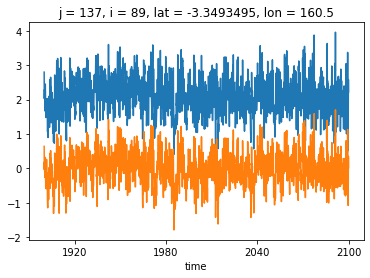

In [59]:

#trendXr.isel(i=20,j=20).plot()

detrendXr.isel(i=20,j=20).plot()

sstAnomXr.isel(i=20,j=20).plot()

In [26]:
#there seems to be a bug in the Eof solver that doesn't handle dask very well,so pre calculating the result makes it work
sstAnomXr.load()

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.04/lib/python3.8/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


<xarray.DataArray (time: 2400, j: 61, i: 140)>
array([[[-0.74029985, -0.91152828,         nan, ..., -0.54312586,
         -0.66007815, -0.61433841],
        [-1.06203691, -0.75034211,         nan, ..., -0.43535408,
         -0.29642672, -0.30377745],
        [-0.96494723, -0.62085887,         nan, ..., -0.41819786,
         -0.08240423, -0.00998555],
        ...,
        [-0.04702824, -0.01224343, -0.07564344, ..., -0.02901366,
         -0.01685732, -0.19968061],
        [ 0.07018422,  0.0636333 , -0.02062397, ...,  0.09138569,
         -0.03299557, -0.17915861],
        [ 0.16496951,  0.14229781,  0.05994223, ...,  0.17480314,
          0.0626387 , -0.08794448]],

       [[ 0.16413582,  0.44681039,         nan, ...,  0.25687509,
          0.05842717, -0.12380714],
        [-0.11120385,  0.20441995,         nan, ...,  0.34826303,
          0.44603399,  0.29623011],
        [-0.14849486,  0.13600189,         nan, ...,  0.53017356,
          0.77010593,  0.59098113],
...
        [ 0.06613302,  0.10913648,  0.12052286, ..., -0.09579373,
          0.10201244,  0.0938041 ],
        [ 0.05973004,  0.14524979,  0.19203035, ..., -0.34059099,
         -0.10256205,  0.01552777],
        [ 0.05003686,  0.11103072,  0.16458749, ..., -0.3443996 ,
         -0.08646933, -0.1351995 ]],

       [[-0.61202879,  0.14129764,         nan, ...,  0.02256383,
          0.25517884,  0.52843799],
        [-0.54356121,  0.19778444,         nan, ..., -0.15313353,
          0.37397077,  0.64154867],
        [-0.03843654,  0.59196386,         nan, ...,  0.1642337 ,
          0.47963178,  0.73722097],
        ...,
        [ 0.08980299,  0.08009446,  0.00292502, ..., -0.03294553,
          0.23752589,  0.33297122],
        [ 0.10616757,  0.00953357, -0.07715274, ..., -0.00803711,
          0.21143529,  0.22409596],
        [ 0.10321134,  0.01300265, -0.03726389, ..., -0.2487674 ,
          0.04554801,  0.00403628]]])
Coordinates:
  * time     (time) object 1900-01-16 00:00:00 ... 2099-12-16 00:00:00
  * j        (j) int32 117 118 119 120 121 122 123 ... 172 173 174 175 176 177
  * i        (i) int32 69 70 71 72 73 74 75 76 ... 202 203 204 205 206 207 208
    lat      (j, i) float32 -14.89 -14.89 -14.89 -14.89 ... 14.89 14.89 14.89
    lon      (j, i) float32 140.5 141.5 142.5 143.5 ... 276.5 277.5 278.5 279.5
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

In [39]:
def myFunc(xr):

    #although they don't really say this, I've applied an area weighting.

    #weights = numpy.cos(numpy.deg2rad(xr.lat)
    #                ).values[..., numpy.newaxis]

    solver=Eof(xr) #, weights=weights)

    #each described by a principal spatial pattern and an associated
    #principal component (PC) time series.

    pcXr = solver.pcs(pcscaling=1, npcs=2)
   
    return pcXr

In [40]:
pcTimeXr=myFunc(sstAnomXr)

In [41]:
pcTimeXr

<xarray.DataArray 'pcs' (time: 2400, mode: 2)>
array([[-0.21687189, -0.54747834],
       [-0.23928846,  0.44724193],
       [-0.85586766, -0.39039428],
       ...,
       [-0.80832387,  0.78755658],
       [-0.38436414,  1.67383702],
       [-0.69753887,  1.34562107]])
Coordinates:
  * time     (time) object 1900-01-16 00:00:00 ... 2099-12-16 00:00:00
  * mode     (mode) int64 0 1
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

In [30]:
import cartopy.crs as ccrs
def ensoPlotter(da, ax):
    cs=plt.contourf(da.lon, da.lat, da.values,  
                    transform=ccrs.PlateCarree(), 
                   center=True)

    gl=ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle=':')
    ax.coastlines(color='black')
    gl.top_labels=False
    #gl.left_labels=False

        #bottom legend
    cbar=plt.colorbar(orientation='horizontal', fraction=0.05, pad=0.05)

In [42]:
pcTimeXr.std('time')

<xarray.DataArray 'pcs' (mode: 2)>
array([0.99979164, 0.99979164])
Coordinates:
  * mode     (mode) int64 0 1

In [43]:
pcTimeXr.mean('time')

<xarray.DataArray 'pcs' (mode: 2)>
array([ 4.12632891e-17, -1.07321559e-17])
Coordinates:
  * mode     (mode) int64 0 1

In [44]:
#pc1 = tp.averageForTimePeriod(pcTimeXr.sel(mode=0).rename('enso').to_dataset()).enso
#pc2 = tp.averageForTimePeriod(pcTimeXr.sel(mode=1).rename('enso').to_dataset()).enso

pc1 = pcTimeXr.sel(mode=0)
pc2 = pcTimeXr.sel(mode=1)

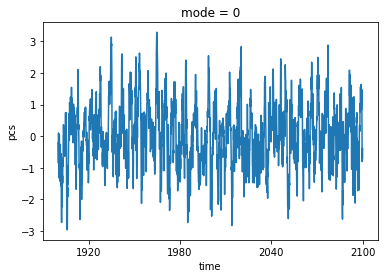

In [45]:
pc1.plot()

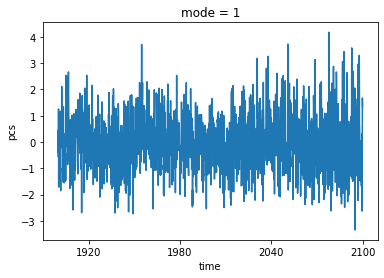

In [46]:
pc2.plot()

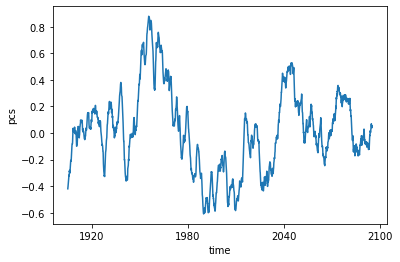

In [50]:
(pc1+pc2).rolling(time=121, center=True).mean().plot()

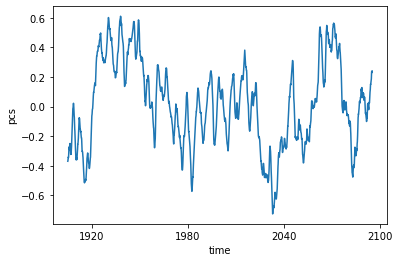

In [49]:
(pc1-pc2).rolling(time=121, center=True).mean().plot()

In [ ]:
import numpy.polynomial as poly

In [ ]:
pFit = poly.Polynomial.fit(pc1, pc2, 2)



In [ ]:
pFit

In [ ]:
pFit.convert()

In [ ]:
alpha = pFit.convert().coef[2]

In [ ]:
alpha

In [ ]:
fig = plt.figure()

plt.scatter(pc1, pc2)

plt.plot(*pFit.linspace())